In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/home/arjunrampal/Documents/Research dataset/"))

# Any results you write to the current directory are saved as output.

['reviewslabel.csv', 'train.csv', 'svm.csv', 'twitter.csv', 'testing.csv', 'test11.csv', 'classifier.sav', 'vectorizer.sav', 'processed_batch.csv', 'train11.csv', 'dataset.csv', 'IMDB Dataset.csv']


In [2]:
#load data in dataframe
df = pd.read_csv("/home/arjunrampal/Documents/Research dataset/svm.csv", encoding='latin-1')
df.head(5)

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [3]:
#df.drop(columns=['Classification','Confidence'],axis=1, inplace=True)
#df.head(5)

In [4]:
df.rename(columns={'sentiment':'label','review':'text'},inplace=True)
df.head(-5)

text     label
0   One of the other reviewers has mentioned that ...  positive
1   A wonderful little production. <br /><br />The...  positive
2   I thought this was a wonderful way to spend ti...  positive
3   Basically there's a family where a little boy ...  negative
4   Petter Mattei's "Love in the Time of Money" is...  positive
..                                                ...       ...
89  Hollywood movie industry is the laziest one in...  negative
90  "Down Periscope" has been in our library since...  positive
91  If you came here, it's because you've already ...  negative
92  Deanna Durbin, Nan Grey and Barbara Read are "...  positive
93  If anyone is wondering why no one makes movies...  positive

[94 rows x 2 columns]

In [5]:
df['review_lower'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [6]:
df['review_nopunc'] = df['review_lower'].str.replace('[^\w\s]', '')

In [7]:
freq=pd.Series(" ".join(df['review_nopunc']).split()).value_counts()[:30]

In [8]:
other_stopwords = ['br','would','even','characters','also','dont','one','much','get','people','first','made','make','could','way','think','watch']
#other_stopwords = ['the','and','a','of','to','is','in','it','i','this','that','br','was','as','for','with','movie','but','film','on','you','not','are','his','have','be','he','its','at']

In [9]:
df['review_nopunc_nostop_nocommon'] = df['review_nopunc'].apply(lambda x: "".join(" ".join(x for x in x.split() if x not in other_stopwords)))

In [10]:
df.head()


text     label  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                        review_lower  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production. <br /><br />the...   
2  i thought this was a wonderful way to spend ti...   
3  basically there's a family where a little boy ...   
4  petter mattei's "love in the time of money" is...   

                                       review_nopunc  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production br br the filmin...   
2  i thought this was a wonderful way to spend ti...   
3  basically theres a family where a little boy j...   
4  petter matteis love in the time of money is a ...   

                       review_nopunc_nostop_nocommon  
0  of the other reviewers has mentioned that afte...  
1  a wonderful little production the filming tech...  
2  i thought this was a wonderful to spend time o...  
3  basically theres a family where a little boy j...  
4  petter matteis love in the time of money is a ...

In [11]:
from textblob import Word

# Lemmatize final review format
df['cleaned_review'] = df['review_nopunc_nostop_nocommon'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [12]:
df.drop(['text','review_lower','review_nopunc','review_nopunc_nostop_nocommon'] , axis=1)

label                                     cleaned_review
0   positive  of the other reviewer ha mentioned that after ...
1   positive  a wonderful little production the filming tech...
2   positive  i thought this wa a wonderful to spend time on...
3   negative  basically there a family where a little boy ja...
4   positive  petter matteis love in the time of money is a ...
..       ...                                                ...
94  negative  i watched this series out of curiositywanting ...
95  positive  daniel daylewis is the most versatile actor al...
96  negative  my guess be this wa originally going to be at ...
97  negative  well i like to bad horror bmovies cause i it i...
98  negative  this is the worst movie i have ever seen a wel...

[99 rows x 2 columns]

In [13]:
df.label.value_counts()
#df.info()

negative    58
positive    41
Name: label, dtype: int64

Text(0.5, 1.0, 'Number of spam or ham messages')

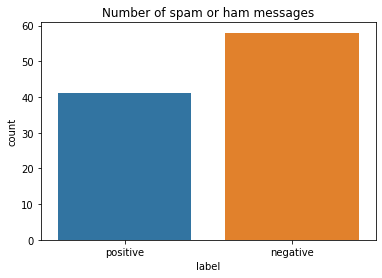

In [14]:
sns.countplot(df.label)
plt.xlabel("label")
plt.title("Number of spam or ham messages")

In [15]:
df["label_as_num"] = df.label.map({"negative":0, "positive":1})

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

y = df['label']
x = df['cleaned_review']
cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
x = cv.fit_transform(x)





In [17]:
import  joblib
joblib.dump(cv.vocabulary_, 'vocab11.pkl')


['vocab11.pkl']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
#Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.70      0.94      0.80        17
    positive       0.86      0.46      0.60        13

    accuracy                           0.73        30
   macro avg       0.78      0.70      0.70        30
weighted avg       0.77      0.73      0.71        30



In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred , average = 'weighted'))
print('Recall score: ', recall_score(y_test, y_pred, average = 'weighted'))

Accuracy score:  0.7333333333333333
Precision score:  0.765631469979296
Recall score:  0.7333333333333333


In [42]:
df1 = pd.read_csv("/home/arjunrampal/Documents/Research dataset/twitter.csv", encoding='latin-1')
df1.head(5)

sentiment                                             review Unnamed: 2  \
0   neutral  According to Gran , the company has no plans t...        NaN   
1   neutral  Technopolis plans to develop in stages an area...        NaN   
2  negative  The international electronic industry company ...        NaN   
3  positive  With the new production plant the company woul...        NaN   
4  positive  According to the company 's updated strategy f...        NaN   

  Unnamed: 3  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

In [50]:
our_list=df1['review']
ser=[]
for name in our_list:
    inp1 = [name]
    inp1 = cv.transform(inp1).toarray()
    result=clf.predict(inp1)    
    print(inp1,result)
    with open('output_1.csv', 'w', newline='') as write_obj:
    # Create a csv.reader object from the input file object
        csv_reader = reader(read_obj)
        # Create a csv.writer object from the output file object
        csv_writer = writer(write_obj)
        # Read each row of the input csv file as list
        for row in csv_reader:
            # Append the default text in the row / list
            row.append(result)
            # Add the updated row / list to the output file
            csv_writer.writerow(row)

[[0 0 0 ... 0 0 0]] ['positive']


TypeError: argument 1 must be an iterator

In [47]:
print(inp1,result)

[[0 0 0 ... 0 0 0]] ['negative']


In [44]:
from csv import writer
from csv import reader

# Open the input_file in read mode and output_file in write mode
with open('svm.csv', 'r') as read_obj, \
        open('output_1.csv', 'w', newline='') as write_obj:
    # Create a csv.reader object from the input file object
    csv_reader = reader(read_obj)
    # Create a csv.writer object from the output file object
    csv_writer = writer(write_obj)
    # Read each row of the input csv file as list
    for row in csv_reader:
        # Append the default text in the row / list
        row.append(r)
        # Add the updated row / list to the output file
        csv_writer.writerow(row)

In [24]:
df_survey_data = pd.read_csv("svm.csv")

In [25]:
COLS = ['text', 'sentiment1','subjectivity','polarity']

In [26]:
import pandas as pd           
from textblob import TextBlob 
from itertools import islice 

In [27]:
for index,row in islice(df_survey_data.iterrows(), 0, None):
    new_entry = []
    df_survey_data.review=df_survey_data.review.astype(str)
    text_lower=(row['review'])
    blob = TextBlob(text_lower.lower())
    sentiment = blob.sentiment
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity
    new_entry += [text_lower,sentiment,subjectivity,polarity] 
    single_survey_sentimet_df = pd.DataFrame([new_entry], columns=COLS)
    df = df.append(single_survey_sentimet_df, ignore_index=True)
df.to_csv('Q7_Text_Sentiment_Values.csv', mode='w', columns=COLS, index=False, encoding="utf-8")

In [28]:
df.head()

text     label  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                        review_lower  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production. <br /><br />the...   
2  i thought this was a wonderful way to spend ti...   
3  basically there's a family where a little boy ...   
4  petter mattei's "love in the time of money" is...   

                                       review_nopunc  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production br br the filmin...   
2  i thought this was a wonderful way to spend ti...   
3  basically theres a family where a little boy j...   
4  petter matteis love in the time of money is a ...   

                       review_nopunc_nostop_nocommon  \
0  of the other reviewers has mentioned that afte...   
1  a wonderful little production the filming tech...   
2  i thought this was a wonderful to spend time o...   
3  basically theres a family where a little boy j...   
4  petter matteis love in the time of money is a ...   

                                      cleaned_review  label_as_num sentiment1  \
0  of the other reviewer ha mentioned that after ...           1.0        NaN   
1  a wonderful little production the filming tech...           1.0        NaN   
2  i thought this wa a wonderful to spend time on...           1.0        NaN   
3  basically there a family where a little boy ja...           0.0        NaN   
4  petter matteis love in the time of money is a ...           1.0        NaN   

   subjectivity  polarity  
0           NaN       NaN  
1           NaN       NaN  
2           NaN       NaN  
3           NaN       NaN  
4           NaN       NaN

In [29]:
inp = "this  is better"#"we got password reset request from your id. click here to reset, if not you please ignore."#"you win a lottery. please click here to claim prize money."
inp1 = [inp]
inp1 = cv.transform(inp1).toarray()
clf.predict(inp1)

array(['negative'], dtype='<U8')

In [30]:
import joblib
joblib.dump(clf, 'NB_spam_model11.pkl')

['NB_spam_model11.pkl']

In [31]:
import joblib
NB_spam_model = open('NB_spam_model11.pkl','rb')
clf = joblib.load(NB_spam_model)